### Perform Exploratory Data Analysis on Dataset 'Global Terrorism'
<ul>
    <li> As a security/defense analyst, try to find out the hot zone of terrorism.</li>
    <li>What all security issues and insights you can derive by EDA?</li>
    </ul>
GRIP July'21

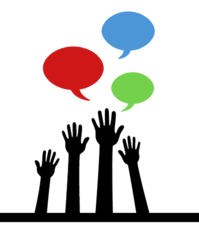

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Globalterrorism.csv")
pd.set_option("display.max_column", None)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
df.shape

(181691, 135)

In [5]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
df.describe()


,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [8]:
pd.set_option("display.max_column", None)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [9]:
df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day','country_txt':'Country','region_txt':'Region',
                   'provstate':'State', 'attacktype1_txt':'Attack_Type', 'target1':'Target', 'city':'City',
                   'latitude':'Latitude','longitude':'Longitude', 'gname':'Group','weaptype1_txt':'Weapon_Type',
                   'nkill':'Killed', 'targtype1_txt':'Target_Type', 'nwound':'Wounded'}, inplace = True)

In [10]:
#Percentage missing values in dataset
missing_value = (((df.isnull().sum()).sum())/df.size)*100
missing_value

56.481718962414206

#### More than 50% values are missing or null. We need to clean the data 

In [11]:
#creating data frame with necessary columns
terr_df = df[['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City', 'Latitude', 'Longitude', 'Attack_Type',
             'Killed', 'Wounded', 'Group', 'Target', 'Target_Type', 'Weapon_Type']]
terr_df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack_Type,Killed,Wounded,Group,Target,Target_Type,Weapon_Type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary


In [12]:
#finding unique values
for i in terr_df.columns:
    print(i, terr_df[i].nunique())

Year 47
Month 13
Day 32
Country 205
State 2854
Region 12
City 36674
Latitude 48322
Longitude 48039
Attack_Type 9
Killed 205
Wounded 238
Group 3537
Target 86006
Target_Type 22
Weapon_Type 12


In [13]:
terr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Attack_Type  181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Group        181691 non-null  object 
 13  Target       181055 non-null  object 
 14  Target_Type  181691 non-null  object 
 15  Weapon_Type  181691 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ MB


In [14]:
terr_df['Wounded'] = terr_df['Wounded'].fillna(0).astype(int)
terr_df['Killed'] = terr_df['Killed'].fillna(0).astype(int)

In [15]:
terr_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
State           421
Region            0
City            434
Latitude       4556
Longitude      4557
Attack_Type       0
Killed            0
Wounded           0
Group             0
Target          636
Target_Type       0
Weapon_Type       0
dtype: int64

### cleaned Data

In [16]:
terr_df.head(10)

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack_Type,Killed,Wounded,Group,Target,Target_Type,Weapon_Type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0,0,Black Nationalists,Cairo Police Headquarters,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0,0,Tupamaros (Uruguay),Juan Maria de Lucah/Chief of Directorate of in...,Police,Firearms
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0,0,Unknown,Edes Substation,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0,0,New Year's Gang,"R.O.T.C. offices at University of Wisconsin, M...",Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0,0,New Year's Gang,Selective Service Headquarters in Madison Wisc...,Government (General),Incendiary


## Univariate Analysis

In [17]:
terr_df['Attack_Type'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_Type, dtype: int64

In [18]:
terr_df['Attack_Type'].value_counts()/terr_df.shape[0]*100

Bombing/Explosion                      48.574228
Armed Assault                          23.484377
Assassination                          10.629035
Hostage Taking (Kidnapping)             6.141196
Facility/Infrastructure Attack          5.699787
Unknown                                 4.004601
Unarmed Assault                         0.558641
Hostage Taking (Barricade Incident)     0.545432
Hijacking                               0.362704
Name: Attack_Type, dtype: float64

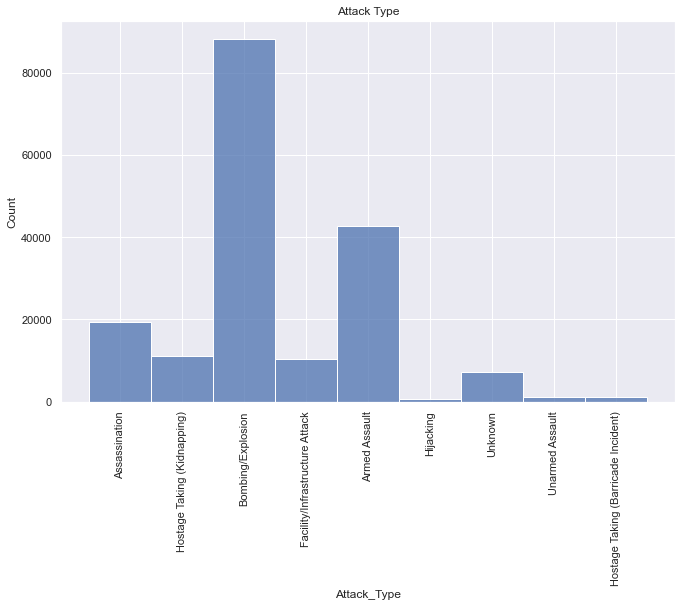

In [19]:
plt.figure(figsize = (11,7))
sns.histplot(terr_df['Attack_Type'])
plt.title('Attack Type')
plt.xticks(rotation=90)
plt.show()

#### Conclusion :
<ul>
    <li> Almost 50% attack happened with Bombing/Explosion.</li>
    <li>10-30% attack happened by Armed Assult and Assasination</li>
    <li>Rest comes under 0-7%</li>

### Terrorist Target : Top 10 countries which targeted most by terrorist

In [20]:
terr_df['Country'].value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

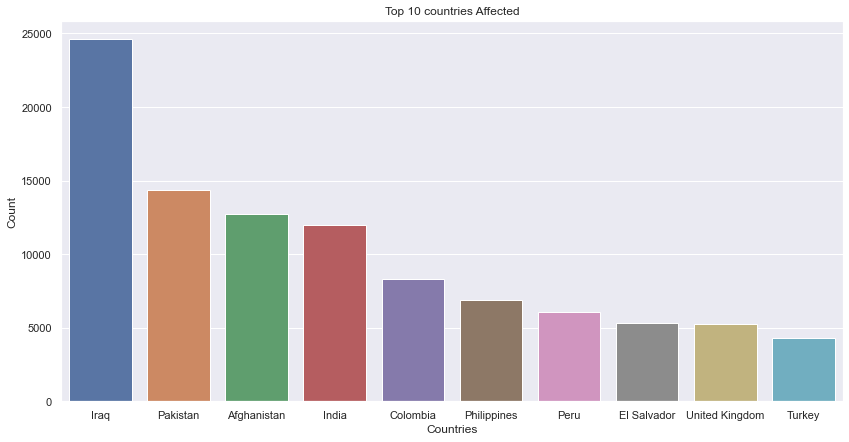

In [21]:
plt.figure(figsize = (14,7))
sns.barplot(terr_df['Country'].value_counts()[:10].index,terr_df['Country'].value_counts()[:10].values)
plt.title('Top 10 countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

#### From above research we can see that Iraq is most affected country by terrorist.

In [22]:
terr_df['Target_Type'].value_counts().head(10)/terr_df.shape[0]*100

Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Name: Target_Type, dtype: float64

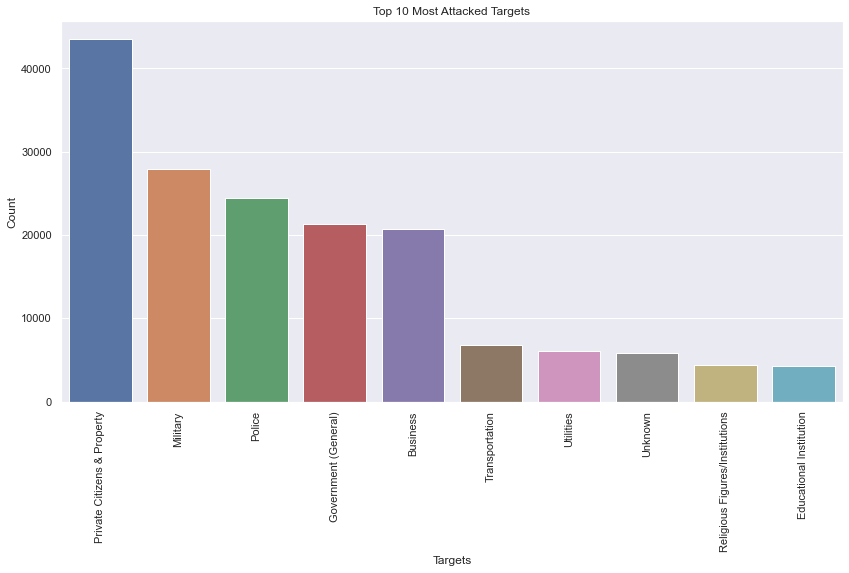

In [23]:
plt.figure(figsize = (14,7))
sns.barplot(terr_df['Target_Type'].value_counts().head(10).index,terr_df['Target_Type'].value_counts().head(10).values)
plt.title('Top 10 Most Attacked Targets')
plt.xlabel('Targets')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### Conclusion:
<ul>
    <li> Private Citizens and Property is targeted most with 25% </li>
    <li> 10-20%  Target is Military, Police, Government, Businees.</li>
    </ul>

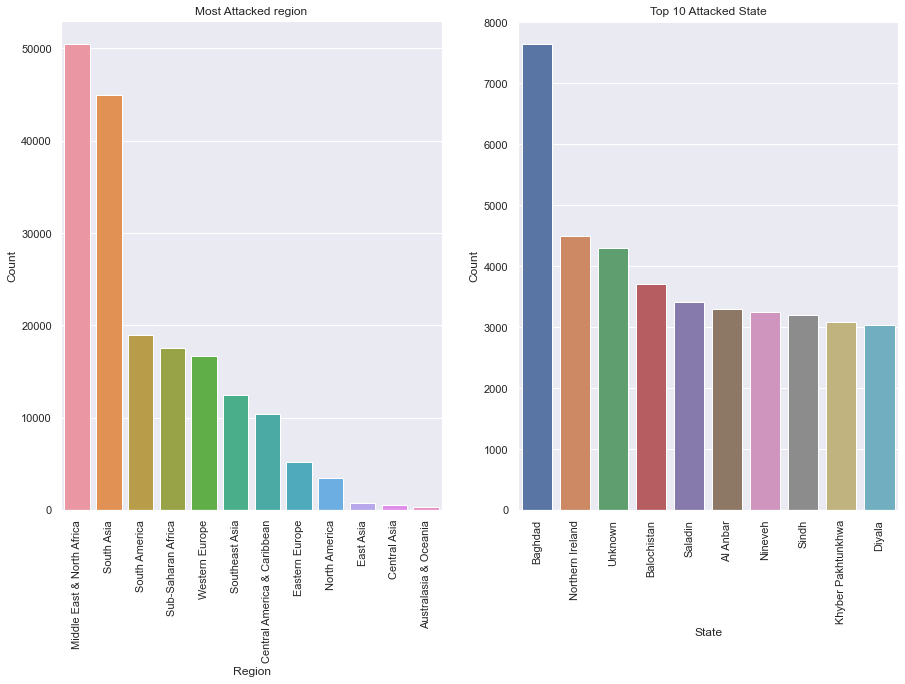

In [24]:
plt.subplot(1,2,1)
sns.barplot(terr_df['Region'].value_counts().index,terr_df['Region'].value_counts().values)
plt.title('Most Attacked region')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.barplot(terr_df['State'].value_counts().head(10).index,terr_df['State'].value_counts().head(10).values)
plt.title('Top 10 Attacked State')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Count')

plt.gcf().set_size_inches(15,9)

<li>Baghdad from Iraq was most attacked State by terroriest</li>

In [25]:
terr_df['Weapon_Type'].value_counts().head(5)/terr_df.shape[0]*100

Explosives    50.869883
Firearms      32.210731
Unknown        8.342185
Incendiary     6.128537
Melee          2.011657
Name: Weapon_Type, dtype: float64

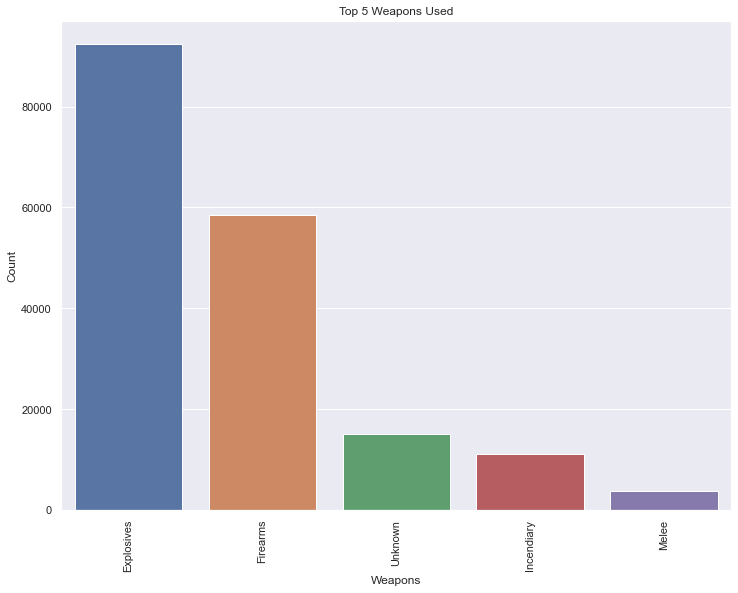

In [26]:
plt.figure(figsize = (12,9))
sns.barplot(terr_df['Weapon_Type'].value_counts().head(5).index, terr_df['Weapon_Type'].value_counts().head(5).values)
plt.title('Top 5 Weapons Used')
plt.xlabel('Weapons')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### Conclusion: 
<ul>
    <li>Almost 50% of time Explosive is used as weapon and 32% times Firearms is used</li>
</ul>

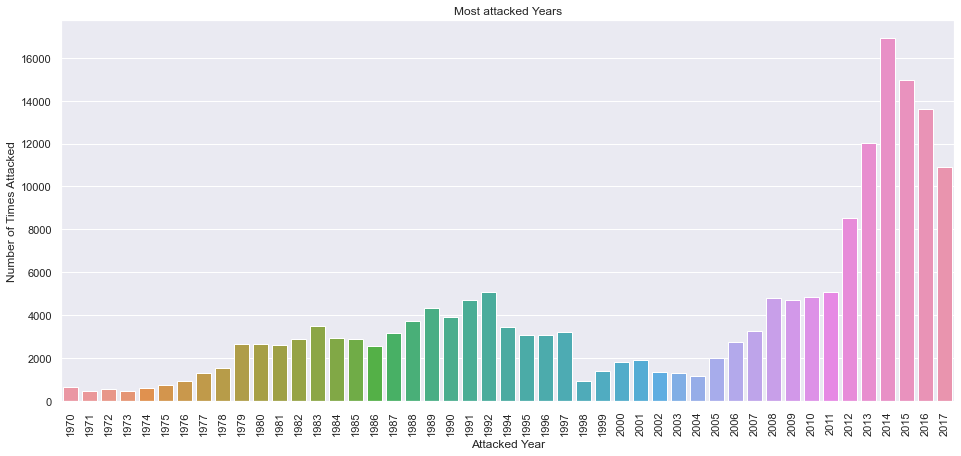

In [27]:
x_year = terr_df['Year'].unique()
y_year = terr_df['Year'].value_counts(dropna=False).sort_index()
sns.barplot(x = x_year, y= y_year)
plt.title('Most attacked Years')
plt.xlabel('Attacked Year')
plt.ylabel('Number of Times Attacked')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(16,7)
plt.show()

#### Conclusion: 
<ul>
    <li> Year 2014 has highest terrorist attacks</li>
    <li> From Year 2014 we can see huge increase in Terrorist attacks</li>
</ul>


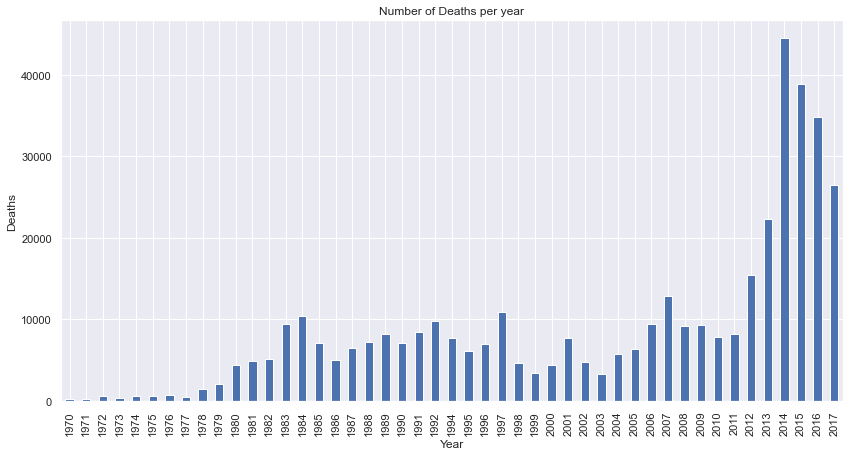

In [28]:
plt.figure(figsize = (14,7))
terr_df.groupby(['Year'])['Killed'].sum().plot(kind='bar')
plt.title('Number of Deaths per year')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.xticks(rotation=90)
plt.show()

<li>Most Number of death was during 2014 i.e above 4000 followed by 2015 and 2016 which conclude that there was increase in terrorist attack after 2013.</li>

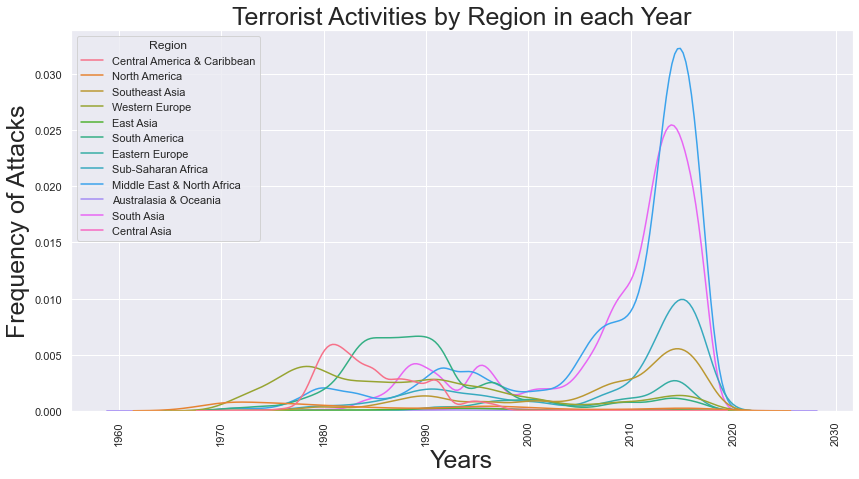

In [29]:
plt.figure(figsize = (14,7))
sns.kdeplot(terr_df['Year'], hue = terr_df['Region'])
plt.title('Terrorist Activities by Region in each Year',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Frequency of Attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()

### Bivariate Analysis

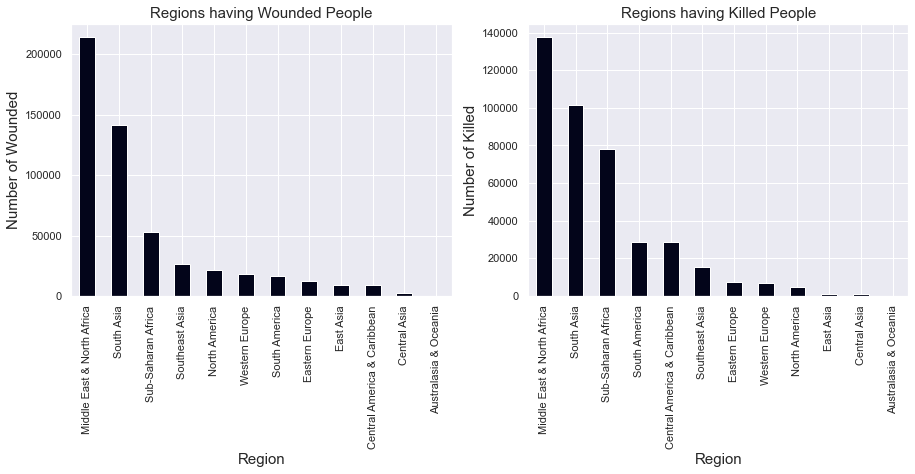

In [30]:
plt.subplot(1,2,1)

terr_df.groupby(['Region'])['Wounded'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Wounded People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
terr_df.groupby(['Region'])['Killed'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Killed People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

In [31]:
terr_df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack_Type,Killed,Wounded,Group,Target,Target_Type,Weapon_Type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary


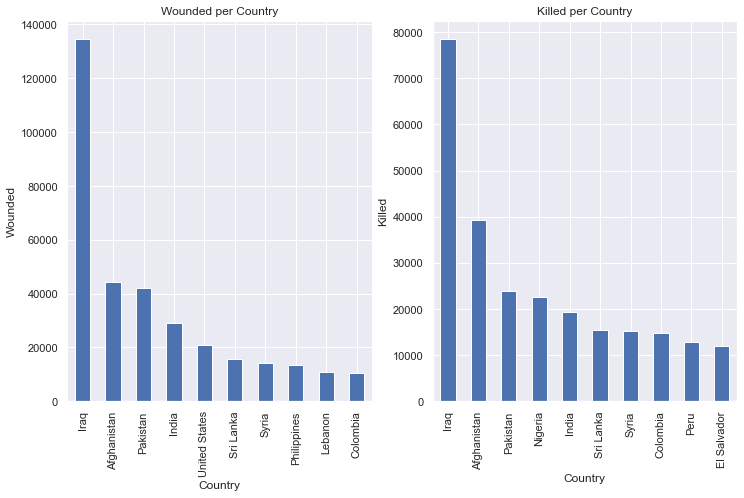

In [32]:
plt.subplot(1,2,1)
terr_df.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Wounded per Country')
plt.xlabel('Country')
plt.ylabel('Wounded')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(12,7)

plt.subplot(1,2,2)
terr_df.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Killed per Country')
plt.xlabel('Country')
plt.ylabel('Killed')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(12,7)

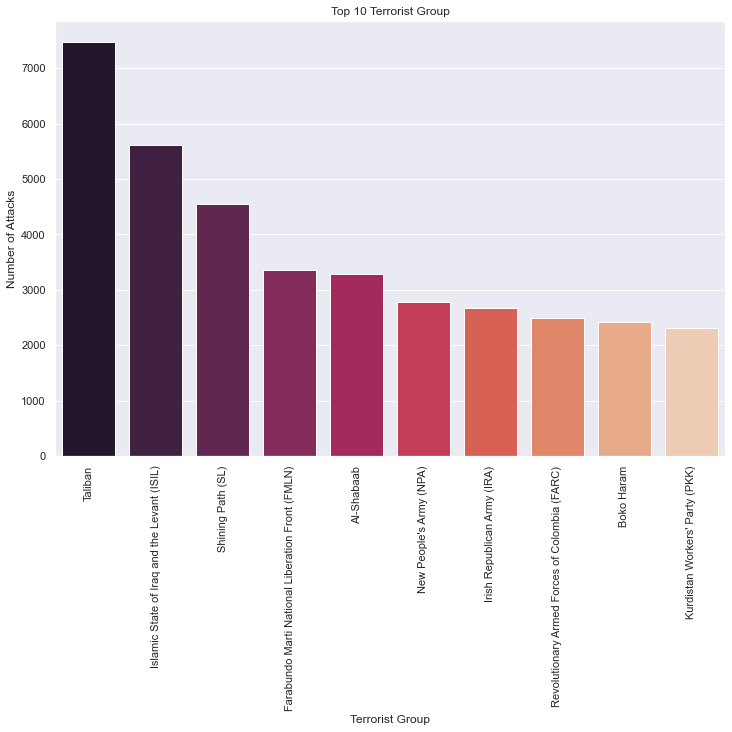

In [33]:
sns.barplot(terr_df['Group'].value_counts()[1:11].index,terr_df['Group'].value_counts()[1:11].values, palette = 'rocket')
plt.title('Top 10 Terrorist Group')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(12,8)

#### Taliban has highest number of attacks followed by ISIL.

In [35]:
#Creating dataframe for taliban
terr_df_tal = terr_df[terr_df.Group == 'Taliban']

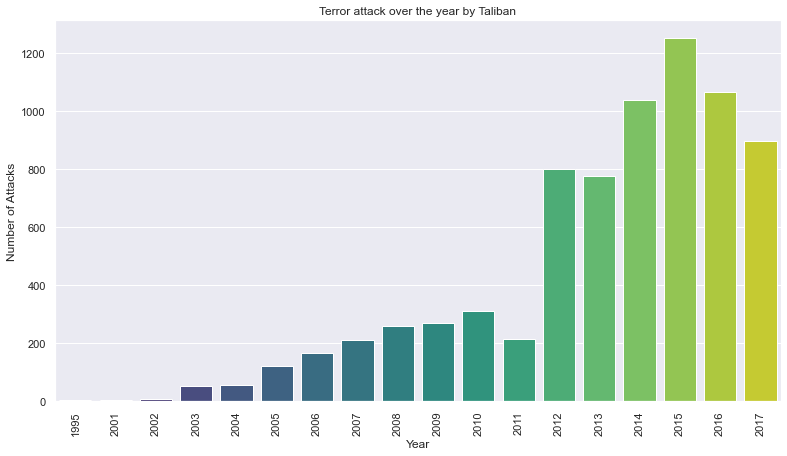

In [40]:
plt.figure(figsize=(13,7))
sns.barplot(terr_df_tal['Year'].value_counts().index, terr_df_tal['Year'].value_counts().values, palette = 'viridis')
plt.title('Terror attack over the year by Taliban')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Number of Attacks')
plt.show()

#### Conclusion:
<ul>
    <li>In year 2015 terror attack of taliban was at its peak.</li>
    <li> After 2012 terror attack rised up and never came down after that.</li>
    </ul>

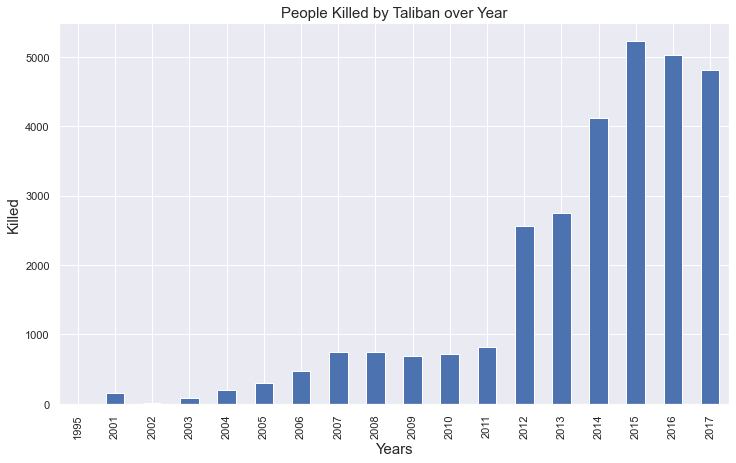

In [44]:
plt.figure(figsize=(12,7))
terr_df_tal.groupby(['Year'])['Killed'].sum().plot(kind = 'bar')
plt.title('People Killed by Taliban over Year', fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Killed',fontsize=15)
plt.show()


#### Taliban first attack was in 2001 after that there were a low number of attacks. After 2011 Taliban became active in terroriest attacks and had the attcks above 5000 in year 2015.

In [45]:
#Creating new data frame for year 2014
terr_df_2014 = terr_df[terr_df.Year == 2014]

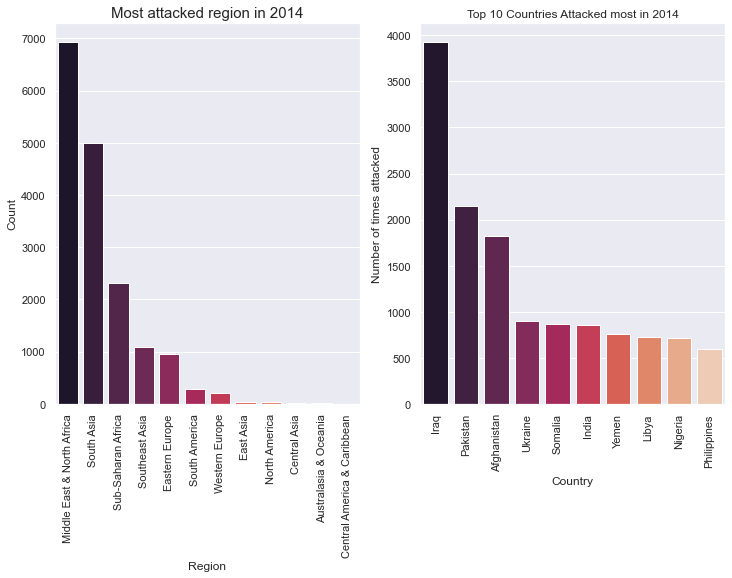

In [51]:
#Regions attacked most in 2014
plt.subplot(1,2,1)
sns.barplot(terr_df_2014['Region'].value_counts().index,terr_df_2014['Region'].value_counts().values, palette = 'rocket')
plt.title('Most attacked region in 2014', fontsize= 15)
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)

#Top 10 countries attacked most
plt.subplot(1,2,2)
sns.barplot(terr_df_2014['Country'].value_counts().head(10).index,terr_df_2014['Country'].value_counts().head(10).values, palette = 'rocket')
plt.title('Top 10 Countries Attacked most in 2014')
plt.xlabel('Country')
plt.ylabel('Number of times attacked')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(12,7)
plt.show()

<ul>
    <li>Middle East and North Africa Region was attacked around 7000 times during 2014 which make it highest attacked region in 2014.</li>
    <li>Iraq situated in Middle East became the Highest Attcked Country in 2014</li> 

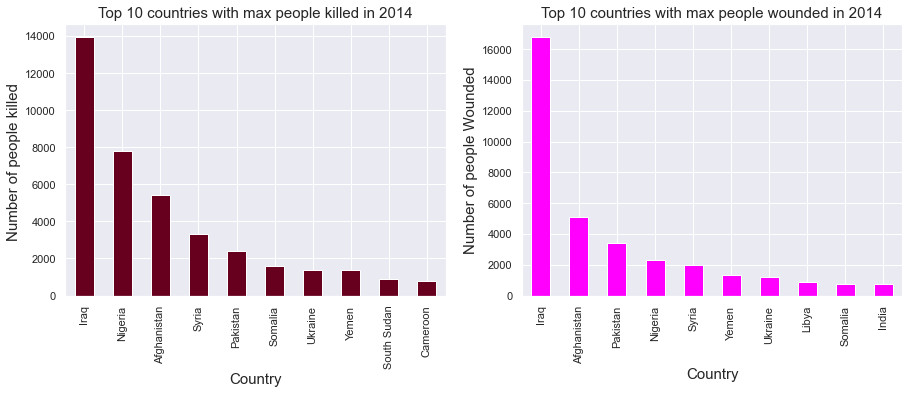

In [52]:
plt.subplot(1,2,1)
terr_df_2014.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='RdBu')
plt.title('Top 10 countries with max people killed in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of people killed ',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
terr_df_2014.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='spring')
plt.title('Top 10 countries with max people wounded in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of people Wounded',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

<ul>
    <li>Around 14k people were killed in Iraq in 2014 which is highest amomg all countries.</li>
    <li>Above 16k people were wounded during year 2014 in iraq which way higher that other countries</li>
    </ul>

## Conclusion:
<ul>
    <li>After Performing Analysis we get the following insight from data:</li>
    <li>Private Citizens and Property were attacked most followed by Military, Police, Government and so on.</li>
    <li>Middle East and North Africa was most affected among the top affected region. Most of the people in this region were either wounded or killed</li>
    <li>Iraq was the country which was most affected by terror attacks and had maximum number of killed and wounded people.</li>
    <li>The State and City that was most affected was Baghdad\</li>
    <li>In the last decade 2014 had most number of terror attacks. That was around 16500 attacks during this year which means on average 45 attacks per day</li>
    <li>The most common attack type was Bombing/Explosion.Explosives have been consistently the most popular weapon of choice for terrorists.</li>
    <li>aliban became more active since 2012 and they are responsible for the most of the terror attacks</li>

## Recomendation:
<ul>
    <li> Since Private Citizens and Property are being targeted consistently so stronger security and surveillance should be provided, especially in the dense populated regions.</li>
    <li>More surveillance is required especially in the Middle East and North African Regions.</li>
    <li>There is need to increase security, survillance and Military in Iraq as it is highest attacked Country</li>
    <li>Strict border policy should be implemented to prevent the movement of explosives between the regions.</li>
</ul>